## CS 6120: Natural Language Processing - Prof. Ahmad Uzair

### Assignment 4: EM, Heirarchical Clustering and HMM
### Total Points: 100 points

In Assignment 4, you will: 1. implement expectation-maximization to train a word-sense induction system; 2. implement Heirarchical Clustering for Name Entity Tagging; 3. implement Viterbi Algorithm based on Hidden Markov Model for Part-of-speech tagging. We recommend you to start this assignment a little early and fully understand these algorithms before jumping into coding. 

# Q1. Expectation Maximization ( points) 

For this part, you will implement question 4 of chapter 5 from the reference book: Introduction to Natural Language Processing (Jacob Eisentein). We recommend you to read from the beginning of chapter 5 to section 5.2.1. Here are some formulas for reference:

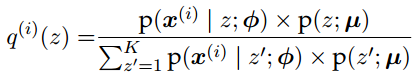

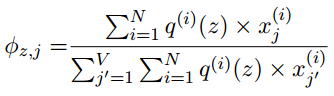

Use expectation-maximization clustering to train a word-sense induction system, applied to the word 'say'.  
• 1.1 Import NLTK, run NLTK.DOWNLOAD() and select SEMCOR. Import SEMCOR from NLTK.CORPUS.  
• 1.2 The command SEMCOR.TAGGED_SENTS(TAG=’SENSE’) returns an iterator over sense-tagged sentences in the corpus. Each sentence can be viewed as an iterator over TREE objects. For TREE objects that are sense-annotated words, you can access the annotation as TREE.LABEL(), and the word itself with TREE.LEAVES(). So SEMCOR.TAGGED_SENTS(TAG=’SENSE’)[0][2].LABEL() would return the sense annotation of the third word in the first sentence.  
• 1.3 Extract all sentences containing the senses SAY.V.01 and SAY.V.02.  
• 2. Build bag-of-words vectors x(i), containing the counts of other words in those sentences, including all words that occur in at least two sentences.  
• 3.1 Implement and run expectation-maximization clustering on the merged data.  
• 3.2 Compute the frequency with which each cluster includes instances of SAY.V.01 and SAY.V.02.

The following code is based on Multinomial distribution. You are free to use another one, like Gaussian distribution.

In [46]:
!pip install svgling
import svgling

import nltk
nltk.download('semcor')
from nltk.corpus import semcor

import numpy as np
from scipy.stats import multinomial

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package semcor to /root/nltk_data...
[nltk_data]   Package semcor is already up-to-date!


## 1. Extract all sentences containing the senses SAY.V.01 and SAY.V.02.

In [47]:
tagged_sents = semcor.tagged_sents(tag='sense')
tagged_sents

[[Tree('DT', ['The']), Tree('group.n.01', [Tree('NE', [Tree('NNP', ['Fulton', 'County', 'Grand', 'Jury'])])]), Tree('say.v.01', [Tree('VB', ['said'])]), Tree('friday.n.01', [Tree('NN', ['Friday'])]), Tree('DT', ['an']), Tree('investigation.n.01', [Tree('NN', ['investigation'])]), Tree('IN', ['of']), Tree('atlanta.n.01', [Tree('NN', ['Atlanta'])]), Tree('POS', ["'s"]), Tree('recent.s.02', [Tree('JJ', ['recent'])]), Tree('primary_election.n.01', [Tree('NN', ['primary', 'election'])]), Tree('produce.v.04', [Tree('VB', ['produced'])]), Tree(None, ['``']), Tree('DT', ['no']), Tree('evidence.n.01', [Tree('NN', ['evidence'])]), Tree(None, ["''"]), Tree('IN', ['that']), Tree('DT', ['any']), Tree('irregularity.n.01', [Tree('NN', ['irregularities'])]), Tree('take_place.v.01', [Tree('VB', ['took', 'place'])]), Tree(None, ['.'])], [Tree('DT', ['The']), Tree('jury.n.01', [Tree('NN', ['jury'])]), Tree('far.r.02', [Tree('RB', ['further'])]), Tree('say.v.01', [Tree('VB', ['said'])]), Tree('IN', ['in']

In [48]:
# get tagged sentences
tagged_sents = semcor.tagged_sents(tag='sense')
#iterate over tagged sentences
# tokenize sentences
sentences = []
tokens = set()

# counts of sentences with say.v.01/say.v.02
labels = [] #1/2
labels1_cnt = 0
labels2_cnt = 0
#count the labels
for tagged_sts in tagged_sents:
  ### Your Code Goes Here ###
  sts=[]
  islabel1=False
  islabel2=False
  for entity in tagged_sts:
    if entity.label()=='say.v.01':
      islabel1=True
    elif entity.label()=='say.v.02':
      islabel2=True
    else:
      sts.extend(entity.leaves())
  if islabel1 or islabel2:
    sentences.append(sts)
    tokens.update(sts)
    if islabel1:
      labels1_cnt+=1
      labels.append(1)
    elif islabel2:
      labels2_cnt+=1
      labels.append(2)
    else:
      pass



In [49]:
# show 5 samples
print(labels[:5])

for sts in sentences[:5]:
  print(' '.join(sts))

[1, 1, 1, 2, 2]
The Fulton County Grand Jury Friday an investigation of Atlanta 's recent primary election produced `` no evidence '' that any irregularities took place .
The jury further in term end presentments that the City Executive Committee , which had over-all charge of the election , `` deserves the praise and thanks of the City of Atlanta '' for the manner in which the election was conducted .
`` Only a relative handful of such reports was received '' , the jury , `` considering the widespread interest in the election , the number of voters and the size of this city '' .
The jury it did find that many of Georgia 's registration and election laws `` are outmoded or inadequate and often ambiguous '' .
The grand jury commented on a number of other topics , among them the Atlanta and Fulton County purchasing departments which it `` are well operated and follow generally accepted practices which inure to the best interest of both governments '' .


In [ ]:
ExpectedOutput='''
[1, 1, 1, 2, 2]
The Fulton County Grand Jury Friday an investigation of Atlanta 's recent primary election produced `` no evidence '' that any irregularities took place .
The jury further in term end presentments that the City Executive Committee , which had over-all charge of the election , `` deserves the praise and thanks of the City of Atlanta '' for the manner in which the election was conducted .
`` Only a relative handful of such reports was received '' , the jury , `` considering the widespread interest in the election , the number of voters and the size of this city '' .
The jury it did find that many of Georgia 's registration and election laws `` are outmoded or inadequate and often ambiguous '' .
The grand jury commented on a number of other topics , among them the Atlanta and Fulton County purchasing departments which it `` are well operated and follow generally accepted practices which inure to the best interest of both governments '' .'''

## 2. Build bag-of-words vectors x(i), containing the counts of other words in those sentences, including all words that occur in at least two sentences.

In [50]:
# words that occur in at least two sentences
vocab = []

### Your Code Goes Here ###
#iterate over all tokens and sentences with two for loops, if token is present in setence, increase count by 1, if count>2 append token to vocab
for token in tokens:
  
  token_count=0
  for sent in sentences:
    if token in sent:
      token_count+=1
    if token_count>=2:
      vocab.append(token)
      break



In [51]:
vocab

['military',
 'preacher',
 'doing',
 'spun',
 'starting',
 'sale',
 'sort',
 'shoulders',
 'Yankee',
 'Roebuck',
 'managers',
 'answered',
 'shortly',
 'Spencer',
 'dog',
 'Maybe',
 'authorities',
 'dear',
 'Catholic',
 'Jackie',
 'opened',
 'forth',
 'carry',
 'search',
 'stage',
 'prostitute',
 'Thayer',
 'Cousin',
 'formally',
 'pockets',
 'cut',
 'Remember',
 'So',
 'formation',
 'dance',
 'religious',
 'Island',
 '1960',
 'police',
 'plans',
 'potential',
 'Fifth',
 'question',
 'produced',
 'Department',
 'Jensen',
 'gas',
 'calls',
 'never',
 'ago',
 'council',
 '*',
 'due',
 'tried',
 'income',
 'Nieman',
 'salary',
 'learning',
 'desert',
 'conference',
 'wide',
 'wait',
 'wall',
 'causes',
 'Mayor',
 'trouble',
 'Government',
 'enjoyed',
 'getting',
 'ice',
 'L.',
 'twist',
 'her',
 '[',
 'suspected',
 'carrier',
 'William',
 'mentioned',
 'Jenkins',
 'Juras',
 'Charles',
 '.',
 'part',
 'ship',
 'jurors',
 'easy',
 'sound',
 'them',
 'Central',
 'Gibby',
 'husband',
 'number

In [52]:
N = len(sentences)
V = len(vocab)

print('Number of sentences:', N)
print('Size of vocabulary:', V)

print('Number of sentences with say.v.01:', labels1_cnt)
print('Number of sentences with say.v.02:', labels2_cnt)

Number of sentences: 1849
Size of vocabulary: 2760
Number of sentences with say.v.01: 1646
Number of sentences with say.v.02: 203


## Expected Output:  
Number of sentences: 1849  
Size of vocabulary: 2760  
Number of sentences with say.v.01: 1646  
Number of sentences with say.v.02: 203  

In [53]:
# Create a dictionary to keep track of index of each word
dict_idx = {}
#have word keys and values is its index, for i in range of V:
### Your Code Goes Here ###
for i in range(V):
  dict_idx[vocab[i]]=i

In [54]:
dict_idx

{'military': 0,
 'preacher': 1,
 'doing': 2,
 'spun': 3,
 'starting': 4,
 'sale': 5,
 'sort': 6,
 'shoulders': 7,
 'Yankee': 8,
 'Roebuck': 9,
 'managers': 10,
 'answered': 11,
 'shortly': 12,
 'Spencer': 13,
 'dog': 14,
 'Maybe': 15,
 'authorities': 16,
 'dear': 17,
 'Catholic': 18,
 'Jackie': 19,
 'opened': 20,
 'forth': 21,
 'carry': 22,
 'search': 23,
 'stage': 24,
 'prostitute': 25,
 'Thayer': 26,
 'Cousin': 27,
 'formally': 28,
 'pockets': 29,
 'cut': 30,
 'Remember': 31,
 'So': 32,
 'formation': 33,
 'dance': 34,
 'religious': 35,
 'Island': 36,
 '1960': 37,
 'police': 38,
 'plans': 39,
 'potential': 40,
 'Fifth': 41,
 'question': 42,
 'produced': 43,
 'Department': 44,
 'Jensen': 45,
 'gas': 46,
 'calls': 47,
 'never': 48,
 'ago': 49,
 'council': 50,
 '*': 51,
 'due': 52,
 'tried': 53,
 'income': 54,
 'Nieman': 55,
 'salary': 56,
 'learning': 57,
 'desert': 58,
 'conference': 59,
 'wide': 60,
 'wait': 61,
 'wall': 62,
 'causes': 63,
 'Mayor': 64,
 'trouble': 65,
 'Government': 

In [55]:
# Finally, the bag-of-words 2D vector:
X = np.zeros((N,V)) # input data
L = np.zeros(N)     # number of tokens in each line

# Each row in X represents a sentence and each column represents a word and we have to count the number of times word appears in senteces. L is number of tokens in each line
### Your Code Goes Here ###
for indx in range(len(sentences)):
    toks=[]
    for word in sentences[indx]:
      if word in dict_idx.keys():
        X[indx][dict_idx[word]]+=1
        toks.append(word)
        L[indx]+=1

    #L[indx]=len(set(toks))



In [56]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
L

array([22., 37., 33., ..., 21.,  7., 17.])

## 3. Implement expectation-maximization clustering on the data.  

Thses are the variables used in the following:  

k: the number of clusters: 2  
F: the φ in the formula, shape: (k,V)  
U: the prior expected frequency, shape: (k)  
Q: the posterior probability, p(z|X), shape: (N,k)

In [58]:
from scipy.stats import multinomial

In [59]:
from nltk.corpus.reader.wordnet import path_similarity
# =============================================================================#
'''
Initialize latent parameters.
'''
#initialize F and U using random function(np.random.random) Normalize F and U, normaloze to add upto 1
def initialize_FU(k):
    ### Your Code Goes Here ###
    F=np.random.random((k,V))
    U=np.random.random((k))
    for i in range(k):
      F_i_sum=sum(F[i])
      F[i]=F[i]/F_i_sum
    U=U / sum(U)
    return F,U


In [ ]:
initialize_FU(2)

(array([[0.00046939, 0.00020662, 0.00023191, ..., 0.00048909, 0.00023868,
         0.00059436],
        [0.00067305, 0.0003084 , 0.00043125, ..., 0.00071425, 0.00031081,
         0.00013767]]), array([0.43322897, 0.56677103]))

In [60]:
# =============================================================================#
def calculate_Q(k, F,U):
    '''
    Calculate the soft distribution over clusters for each data point.
    '''
    Q = np.zeros((N,k))

    ### Your Code Goes Here ###
    #iterate over clusters, multi nomial vector =column in q
    #x,l num o ftrials, p
     #column 1 for q, = f column 1 in multinomial
     #multiply return * u1 column=q

     #normalize q
    
    for i in range(k):
      rv = multinomial.pmf(x=X,n=L,p=F[i])
      Q[:,i]=rv*U[i]
      
    
   #normalize
    for inc in range(N):
      Q[inc]=Q[inc] / sum(Q[inc])

    
    
    return Q

In [61]:
from numpy.random.mtrand import f
# =============================================================================#
def update_FU(k, Q):
    '''
    Update the multinomial distribution parameters F and the cluster prior U.
    '''
    F = np.zeros((k,V))
    U = np.zeros(k)

    ### Your Code Goes Here ###
    #corresponding to k, v
      #dot prod of col of q(i) 2 cols 1 row  and x n,v->fij,   normalize f
    #iterate over k, u=sum of column in q corresponds, normalize
    for i in range(k):
      for j in range(V):
        F[i,j]=np.dot(Q[:,i],X[:,j])
    
    for i in range(k):
      U[i]=sum(Q[:,i])
    for i in range(k):
      F_i_sum=sum(F[i])
      F[i]=F[i]/F_i_sum
    U=U / np.sum(U)
    


    return F,U

In [62]:
# =============================================================================#
def em_algorithm(k, iterations):
    '''
    Do EM by iteratively calculating the posterior and updating the parameters.
    '''
    ### Your Code Goes Here ###
    
    F,U=initialize_FU(k)
    for i in range(iterations):
        # calculate the posterior
        
        Q=calculate_Q(k,F,U)
        
        # update the parameters
        F,U=update_FU(k,Q)
    return Q,F,U


## 3.1 Run EM clustering on a sample data.

In [63]:
# save
saveX = X
saveL = L
saveN = N
saveV = V

# sample data
X = np.array([[2,5],
              [4,4],
              [1,8],
              [6,2],
              [8,2]])
L = [7,8,9,8,10]
N = 5
V = 2

# run EM
Q, F,U = em_algorithm(2, 50)

print('U:\n', U)
print('F:\n', F)
print('Q:\n', Q)

# reload
X = saveX
L = saveL
N = saveN
V = saveV

U:
 [0.42590461 0.57409539]
F:
 [[0.21927158 0.78072842]
 [0.69366997 0.30633003]]
Q:
 [[8.88536073e-01 1.11463927e-01]
 [2.38111780e-01 7.61888220e-01]
 [9.97610437e-01 2.38956289e-03]
 [4.78459422e-03 9.95215406e-01]
 [4.80152106e-04 9.99519848e-01]]


In [ ]:
ExpectedOutput='''
U:
 [0.57409618 0.42590382]
F:
 [[0.69366967 0.30633033]
 [0.21927117 0.78072883]]
Q:
 [[1.11465074e-01 8.88534926e-01]
 [7.61890909e-01 2.38109091e-01]
 [2.38959048e-03 9.97610410e-01]
 [9.95215489e-01 4.78451129e-03]
 [9.99519858e-01 4.80141881e-04]]
'''

##3.2 Compute the frequency of each cluster.

In [92]:
# fix the run
np.random.seed(671)

k = 2
iterations = 20
Q, F,U = em_algorithm(k, iterations)

print('Cluster Frequency:', U)

Cluster Frequency: [0.83407906 0.16592094]


In [93]:
# compute the cluster assignment accuracy
acc = 0

### Your Code Goes Here ###
#u,f,q if zero ind of q, 
pred_labels=[]
for inm in range(N):
  if Q[inm][0]>Q[inm][1]:
    pred_labels.append(1)
  else:
    pred_labels.append(2)
for ind in range(N):
  if pred_labels[ind]==labels[ind]:
    acc+=1
print('Accuracy:', acc/N)

Accuracy: 0.7847485127095727


In [96]:
# fix the run
np.random.seed(49)

k = 2
iterations = 50
Q, F,U = em_algorithm(k, iterations)

print('Cluster Frequency:', U)

Cluster Frequency: [0.74902924 0.25097076]


In [97]:
# compute the cluster assignment accuracy
acc = 0

### Your Code Goes Here ###
#u,f,q if zero ind of q, 
pred_labels=[]
for inm in range(N):
  if Q[inm][0]>Q[inm][1]:
    pred_labels.append(1)
  else:
    pred_labels.append(2)
for ind in range(N):
  if pred_labels[ind]==labels[ind]:
    acc+=1
print('Accuracy:', acc/N)

Accuracy: 0.7009194159004868


In [100]:
# fix the run
np.random.seed(111)

k = 2
iterations = 100
Q, F,U = em_algorithm(k, iterations)

print('Cluster Frequency:', U)

Cluster Frequency: [0.70295416 0.29704584]


In [101]:
# compute the cluster assignment accuracy
acc = 0

### Your Code Goes Here ###
#u,f,q if zero ind of q, 
pred_labels=[]
for inm in range(N):
  if Q[inm][0]>Q[inm][1]:
    pred_labels.append(1)
  else:
    pred_labels.append(2)
for ind in range(N):
  if pred_labels[ind]==labels[ind]:
    acc+=1
print('Accuracy:', acc/N)

Accuracy: 0.6971335857220119


In [102]:
# fix the run
np.random.seed(13)

k = 2
iterations = 5
Q, F,U = em_algorithm(k, iterations)

print('Cluster Frequency:', U)

Cluster Frequency: [0.29684969 0.70315031]


In [103]:
# compute the cluster assignment accuracy
acc = 0

### Your Code Goes Here ###
#u,f,q if zero ind of q, 
pred_labels=[]
for inm in range(N):
  if Q[inm][0]>Q[inm][1]:
    pred_labels.append(1)
  else:
    pred_labels.append(2)
for ind in range(N):
  if pred_labels[ind]==labels[ind]:
    acc+=1
print('Accuracy:', acc/N)

Accuracy: 0.2850189291508924


**Question:** Comment on your result. Is it stable? Why?  
**Answer(1-3 sentences):**

I have experimented with different seeds and iterations values and it looks like the accuracy is fluctuating and unstable. The reasons for this being the algorithm has random initialization for the parameters, slow convergence and tends to make convergence mostly at local optima which affects the calculations of U,F and Q parameters.

## Ques 2) Hierarchical Clustering

## Task 1

In this section we will download articles from wikipedia and then cluster them into groups in the next step. You can select somewhat related topics or fetch the articles randomly. 
(Use dir() and help() functions or refer wikipedia documentation)

https://wikipedia.readthedocs.io/en/latest/code.html#api

In [ ]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pip install wikipedia


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=cbd90a9630676e194e79d8ed9f19b062b875da44630e538dedde1806f5de020c
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [ ]:
### importing dependencies ###

import wikipedia
from wikipedia.exceptions import WikipediaException
import pandas as pd
import re

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import warnings
import numpy as npm

In [ ]:
'''
 Generate a list of wikipedia article titles to cluster 
 You can maintain a static list of titles or generate them randomly using wikipedia library
 Some topics include:
 ["Northeastern Unversity", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science", 
 "Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund", "Finance" ,
 "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football", "Cricket"]0

 You can add more topics from different categories so that we have a diverse datset to work with. 
 Ex- About 10+ categories with 3+ article in each category
'''
# 'article' is a list containing the names of articles to be downloaded
article = ['Northeastern University','Boston','India','Natural Language Processing', 'Quantum machine learning', 'Quantum computing', 'Machine learning', 
 'Artificial intelligence', 'Data science', 'Masters in Data Science','Master of Science in Information & Communication Technology','Massachusetts'
 'Central Bank of India','President of India','M S Dhoni', 'Financial technology', 'Financial technology in India', 'Financial Technologies Group', 
 'International Monetary Fund','World Health Organization','Cricket', 'Football', 'Basketball','Baseball','Chess','Tennis','Swimming','Gym','Trigonometry','Algebra','Calculus','Addition','Multiplication',
 'Mathematics','Deep Learning','Data Analyst','Business Development','Risk Analyst','Graduate Teaching Assistant','Large Scale Parallel Data Processing','Algorithms','Supervised Machine Learning','Unsupervised Machine Learning','Georgia', 'Nikola Tesla']

# download and store all the articles in this variable
data = []
articles=[]
for title in article:
    try:
        data.append(wikipedia.summary(title=title))
        articles.append(title)
    except WikipediaException:
        print(f"Skipping {title}")


Skipping Northeastern University
Skipping India
Skipping Machine learning
Skipping President of India
Skipping Tennis
Skipping Addition
Skipping Georgia


## Task 2

In this step you will decide whether to clean the data or not. If you choose to clean, you may utilize the clean_review function from Assignment 1

**Answer(1-3 sentences):** Why are you (or not) choosing to clean the data? Think in terms of whether cleaning the data will help in the clustering or not.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def clean_message(message):
  #Removing the punctuations, URLs, and @ from the data
  message = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", message).lower()
  #Removing links
  text = re.sub(r'http\S+', '', message)
  #Remove punctuation
  message = re.sub(r'[^\w\s]','',text)
  Words= word_tokenize(message)
  messages=[word for word in Words if word not in stopwords.words('english')]
  lemmatizer = WordNetLemmatizer()
  lem_messages = [lemmatizer.lemmatize(word) for word in messages]
  return " ".join(lem_messages)

In [ ]:
nltk.download('omw-1.4')
clean_new_data = [clean_message(message) for message in data]
print(clean_new_data)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


['boston u uk officially city boston capital populous city commonwealth massachusetts united state 24thmost populous city country city proper cover 484 sq mi 125 km2 population 675647 2020 also making populous city new england seat suffolk county although county government disbanded july 1 1999 city economic cultural anchor substantially larger metropolitan area known greater boston metropolitan statistical area msa home censusestimated 48 million people 2016 ranking tenthlargest msa country broader combined statistical area csa generally corresponding commuting area including providence rhode island home 82 million people making sixth populous united statesboston one oldest municipality united state founded shawmut peninsula 1630 puritan settler english town name scene several key event american revolution boston massacre boston tea party battle bunker hill siege boston upon american independence great britain city continued important port manufacturing hub well center education cultu

## Task 3

In this step, we will vectorize the text data to use in hierarchical clustering. You can use countVectorizer() or TfidfVectorizer() from sklearn library.

In [ ]:
### vectorize the dataset using count vectorizer or tfidf vectorizer and store the vectors in a separate variable
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vecs = TfidfVectorizer()
X = vecs.fit_transform(clean_new_data)

## Task 4

Plot the Dendrogram and try to see the heirarchical relationships between articles.

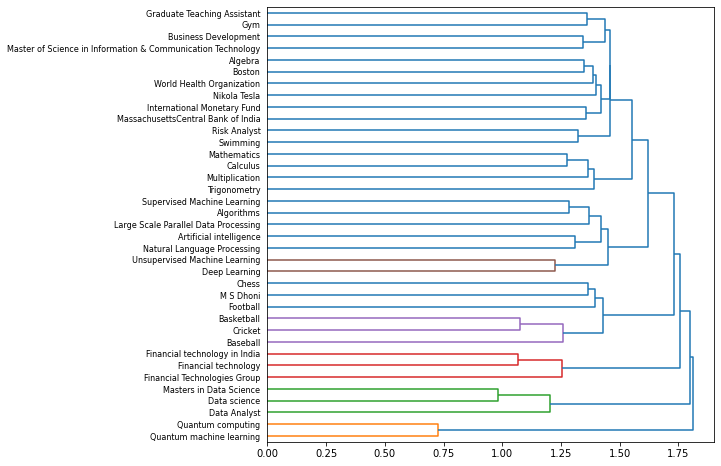

In [ ]:
### importing the dependencies for dendrogram plotting ###
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

### plot the dendrogram


plt.figure(figsize=[8,8])
Z = shc.linkage(X.toarray(), method='ward')
dn = shc.dendrogram(Z, labels=articles, orientation='right')
plt.show()
### Below output is just for your reference purposes.
###Your output is not going to be the same as the output provided below as the list of articles is going to be different  

## Task 4

In this step, we will assign cluster lables to each document/group using Agglomerative Hierarchical clustering.
We can decide number of clusters based on the dendogram and our requirement (how many categories we want).(eg. n_clusters = 3) 

In [ ]:
### importing dependencies for agglomerative clustering ###
from sklearn.cluster import AgglomerativeClustering

### perform agglomerative clustering on the vectors

clusters = 3
clustered = AgglomerativeClustering(clusters,linkage='ward', affinity='euclidean')
clustered.fit_predict(X.todense())

### Below output is just for your reference purposes.
###Your output is not going to be the same as the output provided below as the list of articles is going to be different  

array([0, 0, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
clustered.labels_

array([0, 0, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0])

## Task 5

Now, we will try to visualize top 50 words in each cluster using word clouds

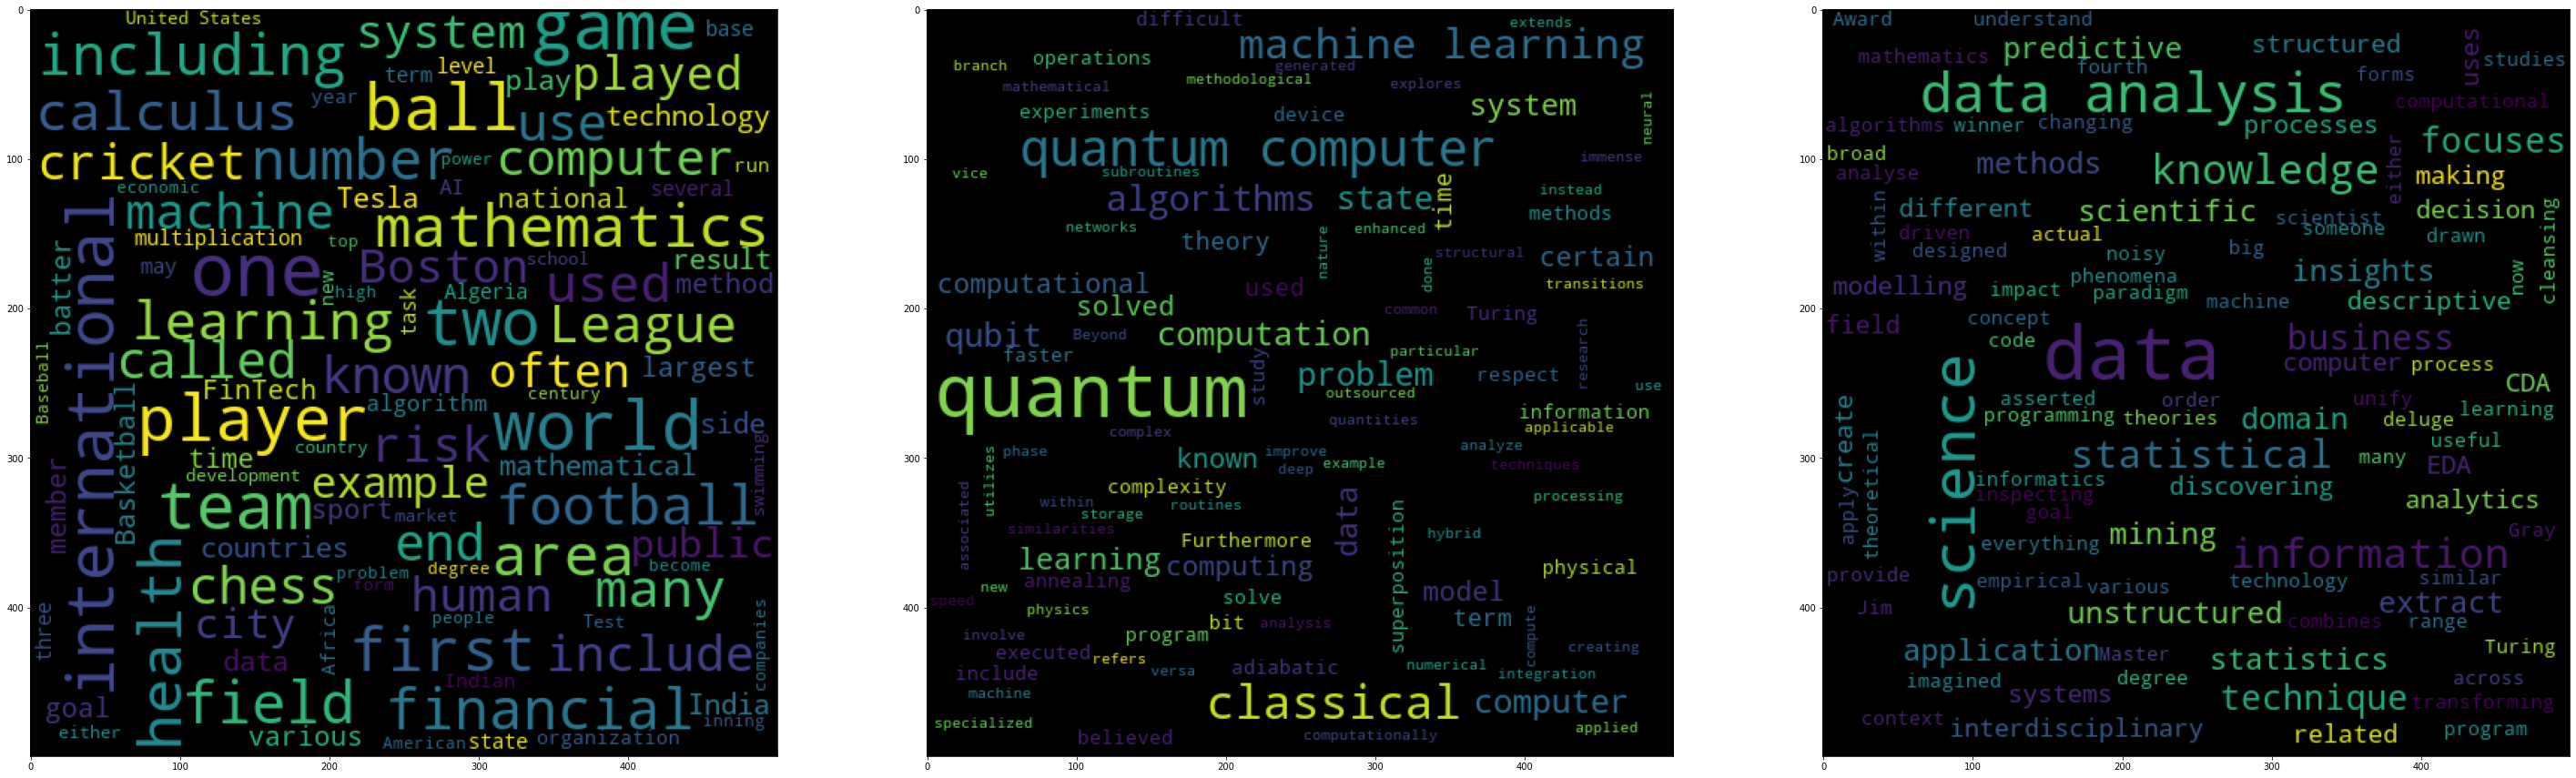

In [ ]:
### importing dependencies for plotting clusters using wordcloud ###

import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.figure(figsize=(50,50), facecolor= None)

for k in range(0, clusters):
  text = []
  for i in range(len(clustered.labels_)):
    if clustered.labels_[i] == k:
      text.append(data[i])
  wordcloud = WordCloud(width= 500, height=500, max_font_size=50,min_font_size=3, max_words=100, background_color='black').generate(' '.join(text))
  plt.subplot(1,3,k+1)
  plt.imshow(wordcloud)
### plot the clusters using word clouds

### Below output is just for your reference purposes.
###Your output is not going to be the same as the output provided below as the list of articles is going to be different  

***Question*** : Comment on the clusters formed above. Does they make any sense?
Answer: The clustering exhibits a pattern and words that are found in similar contexts are located in same clusters. For example, all data related words like data analysis, science, mining, analytics, etc. are grouped together; sports related words are in one cluster and computing related words are grouped together in one cluster.

## Ques 3) Parts of speech tagging. 

Parts of Speech Tagging is the process of the assigning a parts of speech tag (noun, adjective etc..,) to each word in the input sentence. <br>

In this question we will be building HMMs and Viterbi Algorithm. 

### About the Dataset: <br>

For this task we will be using tagged datasets collected from Wall Street Journal. <br>

The file train.pos will be used for training and test.pos will for testing. Along with these two we will be providing vocab.txt the words in this file are the words from the training set that were used two or more times.<br>

The dataset will contain different tags like JJ which means adjective, DT means determiner etc.., for better understaning of the tags refer to [this link](http://relearn.be/2015/training-common-sense/sources/software/pattern-2.6-critical-fork/docs/html/mbsp-tags.html)

In [ ]:
##############################################################################################
##### Dont change anything in this code cell , only change the data paths accordingly  #######
##############################################################################################

#Importing necessary packages

import pandas as pd
from collections import defaultdict
import math
import numpy as np
import string

# Punctuation characters
punct = set(string.punctuation)

# Morphology rules used to assign unknown word tokens
noun_suffix = ["action", "age", "ance", "cy", "dom", "ee", "ence", "er", "hood", "ion", "ism", "ist", "ity", "ling", "ment", "ness", "or", "ry", "scape", "ship", "ty"]
verb_suffix = ["ate", "ify", "ise", "ize"]
adj_suffix = ["able", "ese", "ful", "i", "ian", "ible", "ic", "ish", "ive", "less", "ly", "ous"]
adv_suffix = ["ward", "wards", "wise"]

# Utility functions which we further need

def get_word_tag(line, vocab): 
    if not line.split():
        word = "--n--"
        tag = "--s--"
        return word, tag
    else:
        word, tag = line.split()
        if word not in vocab: 
            # Handle unknown words
            word = assign_unk(word)
        return word, tag
    return None 


def preprocess(vocab, data_fp):
    """
    Preprocess data
    """
    orig = []
    prep = []

    # Read data
    with open(data_fp, "r") as data_file:

        for cnt, word in enumerate(data_file):

            # End of sentence
            if not word.split():
                orig.append(word.strip())
                word = "--n--"
                prep.append(word)
                continue

            # Handle unknown words
            elif word.strip() not in vocab:
                orig.append(word.strip())
                word = assign_unk(word)
                prep.append(word)
                continue

            else:
                orig.append(word.strip())
                prep.append(word.strip())

    assert(len(orig) == len(open(data_fp, "r").readlines()))
    assert(len(prep) == len(open(data_fp, "r").readlines()))

    return orig, prep


def assign_unk(tok):
    """
    Assign unknown word tokens
    """
    # Digits
    if any(char.isdigit() for char in tok):
        return "--unk_digit--"

    # Punctuation
    elif any(char in punct for char in tok):
        return "--unk_punct--"

    # Upper-case
    elif any(char.isupper() for char in tok):
        return "--unk_upper--"

    # Nouns
    elif any(tok.endswith(suffix) for suffix in noun_suffix):
        return "--unk_noun--"

    # Verbs
    elif any(tok.endswith(suffix) for suffix in verb_suffix):
        return "--unk_verb--"

    # Adjectives
    elif any(tok.endswith(suffix) for suffix in adj_suffix):
        return "--unk_adj--"

    # Adverbs
    elif any(tok.endswith(suffix) for suffix in adv_suffix):
        return "--unk_adv--"

    return "--unk--"


# for viterbi
def compute_accuracy(pred, y):
    '''
    Input: 
        pred: a list of the predicted parts-of-speech 
        y: a list of lines where each word is separated by a '\t' (i.e. word \t tag)
    Output: 
        
    '''
    num_correct = 0
    total = 0
    
    # Zip together the prediction and the labels
    for prediction, y in zip(pred, y):
        ### START CODE HERE (Replace instances of 'None' with your code) ###
        # Split the label into the word and the POS tag
        word_tag_tuple = y.split()
        
        # Check that there is actually a word and a tag
        # no more and no less than 2 items
        if len(word_tag_tuple)!=2: # complete this line
            continue 

        # store the word and tag separately
        word, tag = word_tag_tuple
        
        # Check if the POS tag label matches the prediction
        if prediction == tag: # complete this line
            
            # count the number of times that the prediction
            # and label match
            num_correct += 1
            
        # keep track of the total number of examples (that have valid labels)
        total += 1
        
        ### END CODE HERE ###
    return num_correct/total


# load in the training corpus
with open("training.pos.txt", 'r') as f:
    training_corpus = f.readlines()

# read the vocabulary data, split by each line of text, and save the list
with open("vocab.txt", 'r') as f:
    voc_l = f.read().split('\n')

# vocab: dictionary that has the index of the corresponding words
vocab = {} 

# Get the index of the corresponding words. 
for i, word in enumerate(sorted(voc_l)): 
    vocab[word] = i       
    

cnt = 0
for k,v in vocab.items():
    cnt += 1
    if cnt > 20:
        break

# load in the test corpus
with open("test.pos.txt", 'r') as f:
    y = f.readlines()

#corpus without tags, preprocessed
_, prep = preprocess(vocab, "test.words.txt")



### Task 3.1 

In this task we are expected to build a function which takes training_corpus as input and return transition counts, emission counts and tag counts. <br> 



1. `Tranition count`: maps prev_tag, tag) to the number of times it has appeared.
2. `Emission_counts`: maps (tag, word) to the number of times it appeared.
3. `Tag_counts`: maps (tag) to the number of times it has occured.



In [ ]:
def create_dictionaries(training_corpus, vocab):
    """
    Input: 
        training_corpus: a corpus where each line has a word followed by its tag.
        vocab: a dictionary where keys are words in vocabulary and value is an index
    Output: 
        emission_counts: a dictionary where the keys are (tag, word) and the values are the counts
        transition_counts: a dictionary where the keys are (prev_tag, tag) and the values are the counts
        tag_counts: a dictionary where the keys are the tags and the values are the counts
    """
    
    # initialize the dictionaries using defaultdict
    emission_counts = defaultdict(int)
    transition_counts = defaultdict(int)
    tag_counts = defaultdict(int)
    
    # Initialize "prev_tag" (previous tag) with the start state, denoted by '--s--'
    prev_tag = '--s--' 
    
    # use 'i' to track the line number in the corpus
    i = 0 
    
    # Each item in the training corpus contains a word and its POS tag
    # Go through each word and its tag in the training corpus
    for word_tag in training_corpus:
        
        # Increment the word_tag count
        i += 1
            
        ### START CODE HERE (Replace instances of 'None' with your code) ###
        # Every 50,000 words, print the word count
        if i % 50000 == 0:
            print(f"word count = {i}")
            
        ### START CODE HERE (Replace instances of 'None' with your code) ###
        # get the word and tag using the get_word_tag helper function
        word_from_helper, tag_from_helper = get_word_tag(word_tag, vocab)
        
        # Increment the transition count for the previous word and tag
        transition_counts[(prev_tag, tag_from_helper)] += 1
            
        # Increment the emission count for the tag and word
        emission_counts[(tag_from_helper, word_from_helper)] += 1

        # Increment the tag count
        tag_counts[tag_from_helper] += 1

        # Set the previous tag to this tag (for the next iteration of the loop)
        prev_tag = tag_from_helper
        ### END CODE HERE ###
        
    return emission_counts, transition_counts, tag_counts

In [ ]:
emission_counts, transition_counts, tag_counts = create_dictionaries(training_corpus, vocab)

word count = 50000
word count = 100000
word count = 150000
word count = 200000
word count = 250000
word count = 300000
word count = 350000
word count = 400000
word count = 450000
word count = 500000
word count = 550000
word count = 600000
word count = 650000
word count = 700000
word count = 750000
word count = 800000
word count = 850000
word count = 900000
word count = 950000


In [ ]:
# get all the POS states. States are parts of speech designation found in the training dataset.
states = sorted(tag_counts.keys())
print(f"Number of POS tags (number of 'states'): {len(states)}")
print("View these POS tags (states)")
print(states)

Number of POS tags (number of 'states'): 46
View these POS tags (states)
['#', '$', "''", '(', ')', ',', '--s--', '.', ':', 'CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB', '``']


##### Expected Output

```CPP
Number of POS tags (number of 'states'46
View these states
['#', '$', "''", '(', ')', ',', '--s--', '.', ':', 'CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB', '``']
```

In [ ]:
print("transition examples: ")
for ex in list(transition_counts.items())[:3]:
    print(ex)
print()

print("emission examples: ")
for ex in list(emission_counts.items())[:3]:
    print (ex)
print()

print("ambiguous word example: ")
for tup,cnt in list(emission_counts.items())[:3]:
    print(tup, cnt) 

transition examples: 
(('--s--', 'IN'), 5050)
(('IN', 'DT'), 32364)
(('DT', 'NNP'), 9044)

emission examples: 
(('IN', 'In'), 1735)
(('DT', 'an'), 3142)
(('NNP', 'Oct.'), 317)

ambiguous word example: 
('IN', 'In') 1735
('DT', 'an') 3142
('NNP', 'Oct.') 317



##### Expected Output

```CPP
transition examples: 
(('--s--', 'IN'), 5050)
(('IN', 'DT'), 32364)
(('DT', 'NNP'), 9044)

emission examples: 
(('IN', 'In'), 1735)
(('DT', 'an'), 3142)
(('NNP', 'Oct.'), 317)

ambiguous word example: 
('IN', 'In') 1735
('DT', 'an') 3142
('NNP', 'Oct.') 317
```

### Task 3.2: 

You need to complete the `predict_pos` function below which takes preprocessed test corpus (prep), Original tagged test corpus `y`, emission counts, vocab and states. <br>

Ultimately in this function for a given preprocessed test corpus, you will assign a parts-of-speech tag to every word in that corpus. Using the original tagged test corpus, you will then compute what percent of the tags you got correct. <br>

In [ ]:
def predict_pos(prep, y, emission_counts, vocab, states):
    '''
    Input: 
        prep: a preprocessed version of 'y'. A list with the 'word' component of the tuples.
        y: a corpus composed of a list of tuples where each tuple consists of (word, POS)
        emission_counts: a dictionary where the keys are (tag,word) tuples and the value is the count
        vocab: a dictionary where keys are words in vocabulary and value is an index
        states: a sorted list of all possible tags for this assignment
    Output: 
        accuracy: Number of times you classified a word correctly
    '''
    
    
    num = 0
    n = 0
    tag_word_tup = set(emission_counts.keys())
    den = len(y)
    
    for word_pos in y:
        word_1, pos_1 = get_word_tag(word_pos, vocab)
        
        if word_1 and pos_1:
            
            pos_true = pos_1
        else:
            continue

        max_pos, max_pos_count = '', 0
        
        if word_1 in vocab:          
            for val in states:
                key = (val, word_1)
                if key in emission_counts:
                    emiss_count = emission_counts[key]
                    n += 1
                    if emiss_count > max_pos_count:
                        max_pos_count = emiss_count
                        max_pos = val

            
            if max_pos == pos_1:
                num += 1
    accuracy = num / den
    return accuracy

In [ ]:
accuracy_predict_pos = predict_pos(prep, y, emission_counts, vocab, states)
print(f"Accuracy of prediction using predict_pos is {accuracy_predict_pos:.4f}")

Accuracy of prediction using predict_pos is 0.9307


##### Expected Output

```CPP
Accuracy of prediction using predict_pos is 0.8889
```

### Task 3.3 Building Hidden Markov Models for POS.

**Hidden Markov Models** (HMMs) are a class of probabilistic graphical model that allow us to predict a sequence of unknown (hidden) variables from a set of observed variables. <br>

The Markov Model contains a number of states and the probability of transition between those states. 
- In this case, the states are the parts-of-speech. 
- A Markov Model utilizes a transition matrix, `A`. 
- A Hidden Markov Model adds an observation or emission matrix `B` which describes the probability of a visible observation when we are in a particular state. 
- In this case, the emissions are the words in the corpus
- The state, which is hidden, is the POS tag of that word.


### Creating the 'A' transition probabilities matrix

We will be using Smoothing to compute the matrix. 

The smoothing was done as follows: 

$$ P(t_i | t_{i-1}) = \frac{C(t_{i-1}, t_{i}) + \alpha }{C(t_{i-1}) +\alpha * N}$$

- $N$ is the total number of tags
- $C(t_{i-1}, t_{i})$ is the count of the tuple (previous POS, current POS) in `transition_counts` dictionary.
- $C(t_{i-1})$ is the count of the previous POS in the `tag_counts` dictionary.
- $\alpha$ is a smoothing parameter.

In [ ]:
# GRADED FUNCTION: create_transition_matrix
def create_transition_matrix(alpha, tag_counts, transition_counts):
    ''' 
    Input: 
        alpha: number used for smoothing
        tag_counts: a dictionary mapping each tag to its respective count
        transition_counts: transition count for the previous word and tag
    Output:
        A: matrix of dimension (num_tags,num_tags)
    '''
    
    num_tags = len(tag_counts)

    A = np.zeros((num_tags, num_tags))
    # Create sorted version of the tag's list
    sorted_tags = sorted(states)
    for i, previoustag in enumerate(sorted_tags):
        for j, currenttag in enumerate(sorted_tags):
            A[i, j] = (transition_counts[(previoustag, currenttag)] + alpha) / (tag_counts[previoustag] + (len(tag_counts)*alpha))

    ### Your Code Goes Here ###
    

    
    
    return A

In [ ]:
alpha = 0.001
A = create_transition_matrix(alpha, tag_counts, transition_counts)
# Testing your function
print(f"A at row 0, col 0: {A[0,5]:.9f}")
print(f"A at row 3, col 1: {A[3,6]:.4f}")

print("View a subset of transition matrix A")
A_sub = pd.DataFrame(A[10:15,10:15], index=states[10:15], columns = states[10:15] )
print(A_sub)

A at row 0, col 0: 0.007047013
A at row 3, col 1: 0.0000
View a subset of transition matrix A
          CD        DT            EX        FW        IN
CD  0.201542  0.028850  2.734628e-08  0.000055  0.089997
DT  0.022922  0.001576  1.221866e-08  0.000257  0.009665
EX  0.000001  0.002319  1.158687e-06  0.000001  0.000001
FW  0.000004  0.008550  4.272664e-06  0.239273  0.029913
IN  0.059328  0.328388  1.582898e-03  0.000203  0.020415


#### Expected Output: 

```CPP
A at row 0, col 0: 0.007047013
A at row 3, col 1: 0.0000
View a subset of transition matrix A
          CD        DT            EX        FW        IN
CD  0.201542  0.028850  2.734628e-08  0.000055  0.089997
DT  0.022922  0.001576  1.221866e-08  0.000257  0.009665
EX  0.000001  0.002319  1.158687e-06  0.000001  0.000001
FW  0.000004  0.008550  4.272664e-06  0.239273  0.029913
IN  0.059328  0.328388  1.582898e-03  0.000203  0.020415
```

### Creating 'B' emission probabilities matrix

Now you will create the `B` transition matrix which computes the emission probability. 

You will use smoothing as defined below: 

$$P(w_i | t_i) = \frac{C(t_i, word_i)+ \alpha}{C(t_{i}) +\alpha * N}\$$

- $C(t_i, word_i)$ is the number of times $word_i$ was associated with $tag_i$ in the training data (stored in `emission_counts` dictionary).
- $C(t_i)$ is the number of times $tag_i$ was in the training data (stored in `tag_counts` dictionary).
- $N$ is the number of words in the vocabulary
- $\alpha$ is a smoothing parameter. 

The matrix `B` is of dimension (num_tags, N), where num_tags is the number of possible parts-of-speech tags. 

In [ ]:
from nltk import probability
# UNQ_C4 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: create_emission_matrix

def create_emission_matrix(alpha, tag_counts, emission_counts, vocab):
    '''
    Input: 
        alpha: tuning parameter used in smoothing 
        tag_counts: a dictionary mapping each tag to its respective count
        emission_counts: a dictionary where the keys are (tag, word) and the values are the counts
        vocab: a dictionary where keys are words in vocabulary and value is an index
    Output:
        B: a matrix of dimension (num_tags, len(vocab))
    '''
    num_tags = len(tag_counts)
    B = np.zeros((num_tags, len(vocab)))
    # Create sorted version of the tag's list
    

    B = np.zeros((num_tags, len(vocab)))
    n = 0
    for i, tag in enumerate(states):
        for j, word in enumerate(vocab):
            if (tag, word) in emission_counts:
                probability = (emission_counts[(tag, word)] + alpha) / (tag_counts[tag] + (alpha * len(vocab)))
                B[i, j] = probability
            else:
                probability = alpha / (tag_counts[tag] + (alpha * len(vocab)))
                B[i, j] = probability
            if tag == 'CD' and word == '725':    
                print(i, j)



    # Create sorted version of the tag's list
    

    return B

In [ ]:
# creating your emission probability matrix. this takes a few minutes to run. 
B = create_emission_matrix(alpha, tag_counts, emission_counts, list(vocab))

print(f"View Matrix position at row 0, column 0: {B[0,0]:.9f}")
print(f"View Matrix position at row 3, column 1: {B[3,1]:.9f}")

# Try viewing emissions for a few words in a sample dataframe
cidx  = ['725','adroitly','engineers', 'promoted', 'synergy']

# Get the integer ID for each word
cols = [vocab[a] for a in cidx]

# Choose POS tags to show in a sample dataframe
rvals =['CD','NN','NNS', 'VB','RB','RP']

# For each POS tag, get the row number from the 'states' list
rows = [states.index(a) for a in rvals]

# Get the emissions for the sample of words, and the sample of POS tags
B_sub = pd.DataFrame(B[np.ix_(rows,cols)], index=rvals, columns = cidx )
print(B_sub)

10 1700
View Matrix position at row 0, column 0: 0.000006032
View Matrix position at row 3, column 1: 0.000000720
              725      adroitly     engineers      promoted       synergy
CD   8.201296e-05  2.732854e-08  2.732854e-08  2.732854e-08  2.732854e-08
NN   7.521128e-09  7.521128e-09  7.521128e-09  7.521128e-09  2.257091e-05
NNS  1.670013e-08  1.670013e-08  4.676203e-04  1.670013e-08  1.670013e-08
VB   3.779036e-08  3.779036e-08  3.779036e-08  3.779036e-08  3.779036e-08
RB   3.226454e-08  6.456135e-05  3.226454e-08  3.226454e-08  3.226454e-08
RP   3.723317e-07  3.723317e-07  3.723317e-07  3.723317e-07  3.723317e-07


#### Expected Output: 

```CPP
View Matrix position at row 0, column 0: 0.000006032
View Matrix position at row 3, column 1: 0.000000720
              725      adroitly     engineers      promoted       synergy
CD   8.201296e-05  2.732854e-08  2.732854e-08  2.732854e-08  2.732854e-08
NN   7.521128e-09  7.521128e-09  7.521128e-09  7.521128e-09  2.257091e-05
NNS  1.670013e-08  1.670013e-08  4.676203e-04  1.670013e-08  1.670013e-08
VB   3.779036e-08  3.779036e-08  3.779036e-08  3.779036e-08  3.779036e-08
RB   3.226454e-08  6.456135e-05  3.226454e-08  3.226454e-08  3.226454e-08
RP   3.723317e-07  3.723317e-07  3.723317e-07  3.723317e-07  3.723317e-07
```

### Task 3.4 Viterbi Algorithm

In this part of the assignment you will implement the Viterbi algorithm. Specifically, you will use your two matrices, `A` and `B` to compute the Viterbi algorithm. 

We have decomposed this process into three main parts. 

* **Initialization** - In this part you initialize the `best_paths` and `best_probabilities` matrices that you will be populating in `feed_forward`.
* **Feed forward** - At each step, you calculate the probability of each path happening and the best paths up to that point. 
* **Feed backward**: This allows you to find the best path with the highest probabilities. 

### Task 3.4.1 Initialization 
Write a program below that initializes the `best_probs` and the `best_paths` matrix. 

Both matrices will be initialized to zero except for column zero of `best_probs`.  
- Column zero of `best_probs` is initialized with the assumption that the first word of the corpus was preceded by a start token ("--s--"). 
- This allows you to reference the **A** matrix for the transition probability

Here is how to initialize column 0 of `best_probs`:
- The probability of the best path going from the start index to a given POS tag indexed by integer $i$ is denoted by $\textrm{best_probs}[s_{idx}, i]$.
- This is estimated as the probability that the start tag transitions to the POS denoted by index $i$: $\mathbf{A}[s_{idx}, i]$ AND that the POS tag denoted by $i$ emits the first word of the given corpus, which is $\mathbf{B}[i, vocab[corpus[0]]]$.
- Note that vocab[corpus[0]] refers to the first word of the corpus (the word at position 0 of the corpus). 
- **vocab** is a dictionary that returns the unique integer that refers to that particular word.


In [ ]:
import math

# GRADED FUNCTION: initialize
def initialize(states, tag_counts, A, B, corpus, vocab):
    '''
    Input: 
        states: a list of all possible parts-of-speech
        tag_counts: a dictionary mapping each tag to its respective count
        A: Transition Matrix of dimension (num_tags, num_tags)
        B: Emission Matrix of dimension (num_tags, len(vocab))
        corpus: a sequence of words whose POS is to be identified in a list 
        vocab: a dictionary where keys are words in vocabulary and value is an index
    Output:
        best_probs: matrix of dimension (num_tags, len(corpus)) of floats
        best_paths: matrix of dimension (num_tags, len(corpus)) of integers
    '''
    
    sorted_tags = sorted(states)

    #### Your code goes here ####
    tags_nPos = len(tag_counts)
    best_probs = np.zeros((tags_nPos, len(corpus)))
    best_paths = np.zeros((tags_nPos, len(corpus)), dtype=int)
    start_index = sorted_tags.index("--s--")
    for i in range(tags_nPos): 
        if A[start_index,i] == 0: 
            best_probs[i,0] = float('-inf')
        else:
            best_probs[i,0] = math.log(A[start_index,i]) + math.log(B[i,vocab[corpus[0]]] )
           
    return best_probs, best_paths

In [ ]:
best_probs, best_paths = initialize(states, tag_counts, A, B, prep, vocab)

In [ ]:
# Test the function
print(f"best_probs[0,0]: {best_probs[0,0]:.4f}") 
print(f"best_paths[2,3]: {best_paths[2,3]:.4f}")

best_probs[0,0]: -22.6098
best_paths[2,3]: 0.0000


#### Expected Output: 

```CPP
best_probs[0,0]: -22.6098
best_paths[2,3]: 0.0000
```

### Task 3.4.2 Viterbi Forward Implementation

In this part of the assignment, you will implement the `viterbi_forward` segment. In other words, you will populate your `best_probs` and `best_paths` matrices.
- Walk forward through the corpus.
- For each word, compute a probability for each possible tag. 

Store the best_path and best_prob for every possible tag for each word in the matrices `best_probs` and `best_tags` using the pseudo code below.

`for each word in the corpus

    for each POS tag type that this word may be
    
        for POS tag type that the previous word could be
        
            compute the probability that the previous word had a given POS tag, that the current word has a given POS tag, and that the POS tag would emit this current word.
            
            retain the highest probability computed for the current word
            
            set best_probs to this highest probability
            
            set best_paths to the index 'k', representing the POS tag of the previous word which produced the highest probability `

In [ ]:
def viterbi_forward(A, B, test_corpus, best_probs, best_paths, vocab, corpus):
    '''
    Input: 
        A, B: The transiton and emission matrices respectively
        test_corpus: a list containing a preprocessed corpus
        best_probs: an initilized matrix of dimension (num_tags, len(corpus))
        best_paths: an initilized matrix of dimension (num_tags, len(corpus))
        vocab: a dictionary where keys are words in vocabulary and value is an index 
    Output: 
        best_probs: a completed matrix of dimension (num_tags, len(corpus))
        best_paths: a completed matrix of dimension (num_tags, len(corpus))
    '''
    tags_nPos = best_probs.shape[0]
    
    for i in range(1, len(test_corpus)): 
        if i % 5000 == 0:
            print("Words processed : {:>8}".format(i))
        for j in range(tags_nPos): 
            bestprob_i = float("-inf")
            bestpath_i = None
            for k in range(tags_nPos):
                prob = best_probs[k,i-1]+math.log(A[k,j]) +math.log(B[j,vocab[test_corpus[i]]])
                if prob > bestprob_i: 
                    bestprob_i = prob
                    bestpath_i = k
            best_probs[j,i] = bestprob_i
            best_paths[j,i] = bestpath_i
    
    return best_probs, best_paths

In [ ]:
# this will take a few minutes to run => processes ~ 30,000 words
best_probs, best_paths = viterbi_forward(A, B, prep, best_probs, best_paths, vocab, prep)

Words processed :     5000
Words processed :    10000
Words processed :    15000
Words processed :    20000
Words processed :    25000
Words processed :    30000


In [ ]:
# Test this function 
print(f"best_probs[0,1]: {best_probs[0,1]:.4f}") 
print(f"best_probs[0,4]: {best_probs[0,4]:.4f}") 

best_probs[0,1]: -24.7822
best_probs[0,4]: -49.5601


#### Expected Output: 

```CPP
best_probs[0,1]: -35.2828
best_probs[0,4]: -54.4040
```

### Task 3.4.3 Viterbi Backward Implementation

<a name='2.4'></a>
## Part 2.4 Viterbi backward

Now you will implement the Viterbi backward algorithm.
- The Viterbi backward algorithm gets the predictions of the POS tags for each word in the corpus using the `best_paths` and the `best_probs` matrices.

The example below shows how to walk backwards through the best_paths matrix to get the POS tags of each word in the corpus. Recall that this example corpus has three words: "Loss tracks upward".

POS tag for 'upward' is `RB`
- Select the the most likely POS tag for the last word in the corpus, 'upward' in the `best_prob` table.
- Look for the row in the column for 'upward' that has the largest probability.
- Notice that in row 28 of `best_probs`, the estimated probability is -34.99, which is larger than the other values in the column.  So the most likely POS tag for 'upward' is `RB` an adverb, at row 28 of `best_prob`. 
- The variable `z` is an array that stores the unique integer ID of the predicted POS tags for each word in the corpus.  In array z, at position 2, store the value 28 to indicate that the word 'upward' (at index 2 in the corpus), most likely has the POS tag associated with unique ID 28 (which is `RB`).
- The variable `pred` contains the POS tags in string form.  So `pred` at index 2 stores the string `RB`.


POS tag for 'tracks' is `VBZ`
- The next step is to go backward one word in the corpus ('tracks').  Since the most likely POS tag for 'upward' is `RB`, which is uniquely identified by integer ID 28, go to the `best_paths` matrix in column 2, row 28.  The value stored in `best_paths`, column 2, row 28 indicates the unique ID of the POS tag of the previous word.  In this case, the value stored here is 40, which is the unique ID for POS tag `VBZ` (verb, 3rd person singular present).
- So the previous word at index 1 of the corpus ('tracks'), most likely has the POS tag with unique ID 40, which is `VBZ`.
- In array `z`, store the value 40 at position 1, and for array `pred`, store the string `VBZ` to indicate that the word 'tracks' most likely has POS tag `VBZ`.

POS tag for 'Loss' is `NN`
- In `best_paths` at column 1, the unique ID stored at row 40 is 20.  20 is the unique ID for POS tag `NN`.
- In array `z` at position 0, store 20.  In array `pred` at position 0, store `NN`.


In [ ]:
# GRADED FUNCTION: viterbi_backward
def viterbi_backward(best_probs, best_paths, corpus, states):
    '''
    This function returns the best path.
    
    '''
    maxProb = float('-inf')
    maxIndex = 0
    
    #### Your Code Goes Here ####
    s = best_paths.shape[1] 
    arr = [None] * s
    tags_nPos = best_probs.shape[0]
    pred = [None] * s
    m=len(corpus)

    for a in range(tags_nPos):
        if best_probs[a,-1]>maxProb: 
            maxProb = best_probs[a,-1]
            arr[s - 1] = a
    pred[m - 1] = states[a]
    
    for i in range(len(corpus)-1, -1, -1): 
        POS_tag = best_paths[np.argmax(best_probs[:,i]),i]
        arr[i - 1] = best_paths[POS_tag,i]
        pred[i - 1] = states[POS_tag]

    return pred

In [ ]:
# Run and test your function
pred = viterbi_backward(best_probs, best_paths, prep, states)
m=len(pred)
print('The prediction for pred[-7:m-1] is: \n', prep[-7:m-1], "\n", pred[-7:m-1], "\n")
print('The prediction for pred[0:8] is: \n', pred[0:7], "\n", prep[0:7])

The prediction for pred[-7:m-1] is: 
 ['see', 'them', 'here', 'with', 'us', '.'] 
 ['VB', 'PRP', 'RB', 'IN', 'PRP', '.'] 

The prediction for pred[0:8] is: 
 ['DT', 'NN', 'POS', 'NN', 'MD', 'VB', 'VBN'] 
 ['The', 'economy', "'s", 'temperature', 'will', 'be', 'taken']


#### Expected Output: 

```CPP
The prediction for pred[-7:m-1] is: 
 ['see', 'them', 'here', 'with', 'us', '.'] 
 ['VB', 'PRP', 'RB', 'IN', 'PRP', '.'] 

The prediction for pred[0:8] is: 
 ['DT', 'NN', 'POS', 'NN', 'MD', 'VB', 'VBN'] 
 ['The', 'economy', "'s", 'temperature', 'will', 'be', 'taken']
```

### Predicting on the dataset and print accuracy

In [ ]:
print('The word is:', prep[3])
print('Your prediction is:', pred[3])
print('Your corresponding label y is: ', y[3])
print(f"Accuracy of the Viterbi algorithm is {compute_accuracy(pred, y):.4f}")

The word is: temperature
Your prediction is: NN
Your corresponding label y is:  temperature	NN

Accuracy of the Viterbi algorithm is 0.9528


#### Expected Output: 

```CPP
The word is: points
Your prediction is: VBZ
Your corresponding label y is:  points	NNS

Accuracy of the Viterbi algorithm is 0.9531
```